# Tugas

## 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # NumPy untuk operasi numerik
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
from scipy import stats  # SciPy untuk berbagai operasi ilmiah
import seaborn as sns  # Seaborn untuk visualisasi data statistik
import pandas as pd  # Pandas untuk manipulasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Scikit-learn untuk preprocessing data.

# Membaca file 'voice.csv' ke dalam sebuah DataFrame menggunakan Pandas.
# Spesifikasi encoding 'latin-1' diperlukan karena data tidak menggunakan format UTF-8.
df = pd.read_csv('../Pertemuan-04/data/voice.csv', encoding='latin-1')

# Menampilkan lima baris pertama dari DataFrame 'df' untuk melihat data awalnya.
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Hitung jumlah tiap value pada var label

In [2]:
df['label'].value_counts()  # Menghitung dan menampilkan jumlah data pada kolom 'label' yang memiliki nilai unik dan mengurutkannya secara menurun.


male      1584
female    1584
Name: label, dtype: int64

In [3]:
encoder = LabelEncoder()  # Inisiasi objek LabelEncoder untuk mengkodekan nilai dalam kolom 'label'.

df['label'] = encoder.fit_transform(df['label'])  # Menggunakan LabelEncoder untuk mengkodekan nilai dalam kolom 'label'.

df['label'].head()  # Menampilkan lima baris pertama dari kolom 'label' setelah proses pengkodean.


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

heatmap

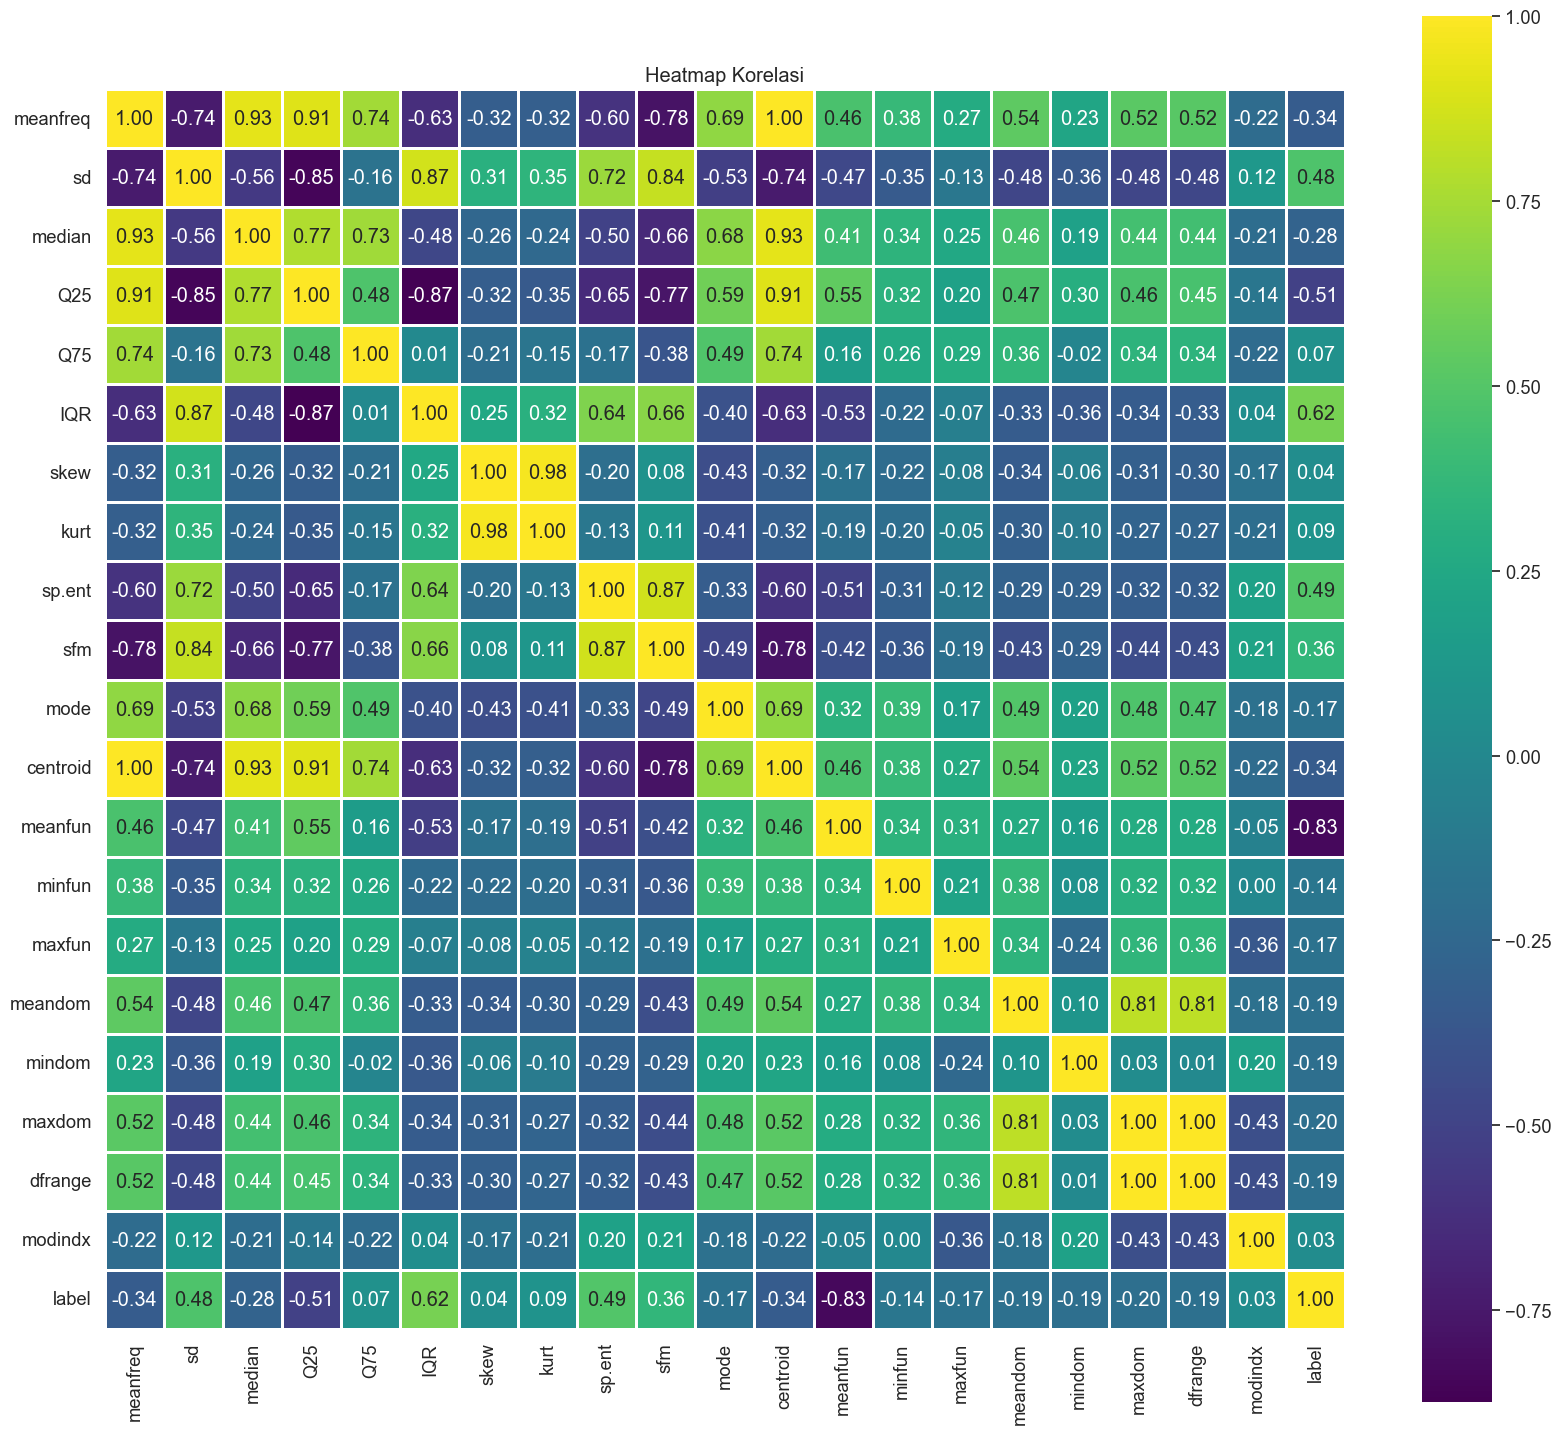

In [4]:
plt.figure(figsize=(20, 18))  # Mengatur ukuran figur (gambar) untuk visualisasi.

corr_matrix = df.corr()  # Menghitung matriks korelasi antar kolom pada DataFrame 'df'.

sns.set(font_scale=1.2)  # Menyesuaikan ukuran font pada plot Seaborn.

# Membuat heatmap korelasi menggunakan Seaborn.
sns.heatmap(corr_matrix, 
            cmap='viridis',  # Memilih skema warna 'viridis' untuk heatmap.
            linewidths=1,  # Ketebalan garis antar sel pada heatmap.
            fmt=".2f",  # Format angka dalam sel heatmap.
            annot=True,  # Menambahkan angka di dalam sel heatmap.
            cbar=True,  # Menampilkan color bar (skala warna) pada sisi kanan heatmap.
            square=True)  # Membuat heatmap menjadi kotak.

plt.title('Heatmap Korelasi')  # Menambahkan judul pada heatmap.
plt.show()  # Menampilkan heatmap.


Kenali vriabel independen dan dependen

In [5]:
X = df.iloc[:,:20]  # Memilih 20 kolom pertama dari DataFrame 'df' dan menyimpannya dalam variabel X.
y = df.label  # Mengambil kolom 'label' dari DataFrame 'df' dan menyimpannya dalam variabel y.

In [6]:
from sklearn.model_selection import train_test_split  # Mengimpor modul train_test_split dari scikit-learn untuk memisahkan data menjadi data pelatihan dan pengujian.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # Memisahkan data X dan y menjadi data pelatihan dan pengujian dengan perbandingan 70% pelatihan dan 30% pengujian. Argumen 'random_state' digunakan untuk mengatur pemilihan data acak agar dapat direproduksi.

x1 = type(X.to_numpy())  # Mengonversi DataFrame 'X' menjadi array NumPy dan kemudian mengecek tipe data hasil konversi.

x1  # Mencetak tipe data hasil konversi 'X' menjadi array NumPy.

numpy.ndarray

import model csv

In [7]:
from sklearn.svm import SVC  # Mengimpor modul SVC (Support Vector Classification) dari scikit-learn untuk menginisialisasi model SVM.

# Inisialisasi model SVM dengan kernel linear, parameter C=1.0, dan gamma='scale'.
svc_model = SVC(kernel='linear', C=1.0, gamma='scale')

Melatih Model dengan Data Training dan Prediksi dengan Data Testing

In [8]:
# Melatih (fit) model SVM dengan data pelatihan
svc_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang telah dilatih pada data pengujian
y_pred = svc_model.predict(X_test)

Akurasi Model SVM Terhadap Label Sebenarnya dan Hasil Prediksi

In [9]:
from sklearn.metrics import accuracy_score  # Mengimpor modul accuracy_score dari scikit-learn untuk mengukur akurasi model.

# Menghitung akurasi dengan membandingkan label sebenarnya (y_test) dengan hasil prediksi (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mencetak hasil akurasi dalam bentuk persentase (dikalikan 100)
print(f'Skor Akurasi : {int(accuracy * 100)}%')


Skor Akurasi : 92%


## 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

### 1. Menggunakan data spam.csv

In [11]:
df = pd.read_csv('../Pertemuan-04/data/spam.csv', encoding='latin-1')  # Membaca file 'spam.csv' ke dalam sebuah DataFrame menggunakan Pandas. Spesifikasi encoding 'latin-1' diperlukan karena data tidak menggunakan format UTF-8.

df.head()  # Menampilkan baris pertama dari DataFrame 'df' untuk melihat data awalnya.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df.drop(df.iloc[:,2:], axis=1)  # Menghapus tiga kolom terakhir (mulai dari kolom indeks ke-2 hingga terakhir) dari DataFrame 'df'.

df.head()  # Menampilkan lima baris pertama dari DataFrame 'df' setelah penghapusan kolom.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Mendefinisikan dictionary 'new_cols' yang akan digunakan untuk merename kolom 'v1' menjadi 'Labels' dan kolom 'v2' menjadi 'SMS'.
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Menggunakan metode 'rename' dari Pandas untuk merename nama kolom sesuai dengan dictionary 'new_cols'.
df = df.rename(columns=new_cols)

# Menampilkan lima baris pertama dari DataFrame 'df' setelah proses rename kolom.
df.head()


,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


cek data

In [14]:
# Cek jumlah data per kelas (Labels) dan menampilkannya.
print(df['Labels'].value_counts())
print('\n')

# Cek kelengkapan data seperti jumlah entri, tipe data, dan penggunaan memori.
print(df.info())
print('\n')

# Cek statistik deskriptif untuk kolom-kolom numerik dalam DataFrame.
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


encoding data label

In [15]:
# Mendefinisikan dictionary 'new_labels' yang akan digunakan untuk mengkodekan label 'spam' menjadi 1 dan label 'ham' menjadi 0.
new_labels = {
    'spam': 1,
    'ham': 0
}

# Menggunakan metode 'map' untuk mengganti nilai dalam kolom 'Labels' sesuai dengan dictionary 'new_labels'.
df['Labels'] = df['Labels'].map(new_labels)

# Menampilkan lima baris pertama dari DataFrame 'df' setelah proses pengkodean label.
df.head()


,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


seperate fitur and label

In [16]:
X = df['SMS'].values  # Mengambil nilai dari kolom 'SMS' sebagai fitur (X) dan mengkonversinya menjadi array.
y = df['Labels'].values  # Mengambil nilai dari kolom 'Labels' sebagai target (y) dan mengkonversinya menjadi array.

### 2. Fitur CountVectorizer dengan mengaktifkan stop_words

In [17]:
from sklearn.model_selection import train_test_split  # Mengimpor modul train_test_split dari scikit-learn untuk memisahkan data menjadi data pelatihan dan pengujian.
from sklearn.feature_extraction.text import CountVectorizer  # Mengimpor modul CountVectorizer dari scikit-learn untuk mengonversi teks menjadi vektor.

# Memisahkan data menjadi data pelatihan dan pengujian dengan perbandingan 70% pelatihan dan 30% pengujian.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi objek CountVectorizer dengan menghapus stop words (kata-kata umum dalam bahasa Inggris).
bow = CountVectorizer(stop_words='english')

# Melakukan fitting dan transformasi pada data pelatihan (X_train) menggunakan CountVectorizer.
X_train = bow.fit_transform(X_train)

# Melakukan transformasi pada data pengujian (X_test) menggunakan CountVectorizer.
X_test = bow.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB  # Mengimpor modul MultinomialNB dari scikit-learn untuk menggunakan algoritma Naive Bayes Multinomial.
from sklearn.metrics import accuracy_score  # Mengimpor modul accuracy_score dari scikit-learn untuk mengukur akurasi model.

# Inisialisasi model Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()

# Melatih (fit) model MNB menggunakan data pelatihan (X_train, y_train)
mnb.fit(X_train, y_train)

# Melakukan prediksi menggunakan model MNB pada data pelatihan
y_pred_train = mnb.predict(X_train)

# Mengukur akurasi pada data pelatihan
acc_train = accuracy_score(y_train, y_pred_train)

# Melakukan prediksi menggunakan model MNB pada data pengujian
y_pred_test = mnb.predict(X_test)

# Mengukur akurasi pada data pengujian
acc_test = accuracy_score(y_test, y_pred_test)

# Mencetak hasil evaluasi akurasi pada data pelatihan dan pengujian dalam format persentase
print(f'Akurasi data pelatihan: {acc_train * 100:.2f}%')
print(f'Akurasi data pengujian: {acc_test * 100:.2f}%')


Akurasi data pelatihan: 99.36%
Akurasi data pengujian: 98.33%


## 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

### 1. Menggunakan data spam.csv

In [19]:
X = df['SMS'].values  # Mengambil nilai dari kolom 'SMS' sebagai fitur (X) dan mengkonversinya menjadi array.
y = df['Labels'].values  # Mengambil nilai dari kolom 'Labels' sebagai target (y) dan mengkonversinya menjadi array.

### 2. Fitur TF-IDF dengan mengaktifkan stop_words

In [20]:
from sklearn.model_selection import train_test_split  # Mengimpor modul train_test_split dari scikit-learn untuk memisahkan data menjadi data pelatihan dan pengujian.
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengimpor modul TfidfVectorizer dari scikit-learn untuk mengonversi teks menjadi vektor dengan metode TF-IDF.

# Memisahkan data menjadi data pelatihan dan pengujian dengan perbandingan 70% pelatihan dan 30% pengujian.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi objek TfidfVectorizer dengan menghapus stop words dalam bahasa Inggris.
tfidf = TfidfVectorizer(stop_words='english')

# Melakukan fitting dan transformasi pada data pelatihan (X_train) menggunakan TfidfVectorizer.
X_train = tfidf.fit_transform(X_train)

# Melakukan transformasi pada data pengujian (X_test) menggunakan TfidfVectorizer.
X_test = tfidf.transform(X_test)


### 3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2

In [22]:
from sklearn.naive_bayes import MultinomialNB  # Mengimpor modul MultinomialNB dari scikit-learn untuk menggunakan algoritma Naive Bayes Multinomial.
from sklearn.metrics import accuracy_score  # Mengimpor modul accuracy_score dari scikit-learn untuk mengukur akurasi model.

# Inisialisasi model Multinomial Naive Bayes (MNB)
mnb = MultinomialNB()

# Melatih (fit) model MNB menggunakan data pelatihan (X_train, y_train)
mnb.fit(X_train, y_train)

# Melakukan prediksi menggunakan model MNB pada data pelatihan
y_pred_train = mnb.predict(X_train)

# Mengukur akurasi pada data pelatihan
acc_train = accuracy_score(y_train, y_pred_train)

# Melakukan prediksi menggunakan model MNB pada data pengujian
y_pred_test = mnb.predict(X_test)

# Mengukur akurasi pada data pengujian
acc_test = accuracy_score(y_test, y_pred_test)

# Mencetak hasil evaluasi akurasi pada data pelatihan dan pengujian dalam format persentase
print(f'Akurasi data pelatihan: {acc_train * 100:.2f}%')
print(f'Akurasi data pengujian: {acc_test * 100:.2f}%')

Akurasi data pelatihan: 98.41%
Akurasi data pengujian: 96.35%


### 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Dalam kasus dataset 'spam.csv', kita dapat menyimpulkan bahwa penggunaan CountVectorizer mungkin menjadi pilihan yang lebih baik karena menghasilkan akurasi yang lebih tinggi. Namun, kita juga perlu memahami bahwa pilihan metode ekstraksi fitur harus disesuaikan dengan karakteristik dataset dan tujuan analisis kita.

CountVectorizer merupakan pilihan yang baik jika kita ingin mengidentifikasi kata-kata yang paling umum dalam dokumen tanpa mempertimbangkan seberapa penting kata-kata tersebut. Dalam metode ini, kita hanya menghitung berapa kali kata-kata muncul dalam dokumen dan mengubahnya menjadi representasi numerik. Ini cocok untuk mengenali kata-kata yang sering muncul.

TF-IDF (Term Frequency-Inverse Document Frequency), di sisi lain, lebih sesuai jika kita ingin memperhitungkan pentingnya kata-kata dalam dokumen. Metode ini memberikan bobot lebih tinggi pada kata-kata yang jarang muncul di seluruh dokumen, sehingga kata-kata yang lebih unik dan informatif mendapatkan perhatian lebih besar dalam analisis.

Pilihan metode tergantung pada apa yang ingin kita capai dalam analisis teks. Jika kita ingin menyoroti kata-kata umum, CountVectorizer cocok. Namun, jika kita ingin lebih fokus pada kata-kata yang memberikan informasi penting, maka TF-IDF lebih sesuai. Kesimpulannya, pemilihan metode ekstraksi fitur harus disesuaikan dengan kebutuhan analisis dan karakteristik dataset.